In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [7]:
df = pd.read_csv('./data.csv', index_col=0)
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 59.8+ KB


In [9]:
df['Amount'] = df['Amount'].map(lambda X: X[1:].replace(',','').strip()).astype('float64')

In [36]:
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-36-b9c6864122be>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [10]:
df.shape

(1094, 6)

In [11]:
df.describe()

,Amount,Boxes Shipped
count,1094.000000,1094.000000
mean,5652.308044,161.797989
std,4102.442014,121.544145
min,7.000000,1.000000
25%,2390.500000,70.000000
50%,4868.500000,135.000000
75%,8027.250000,228.750000
max,22050.000000,709.000000


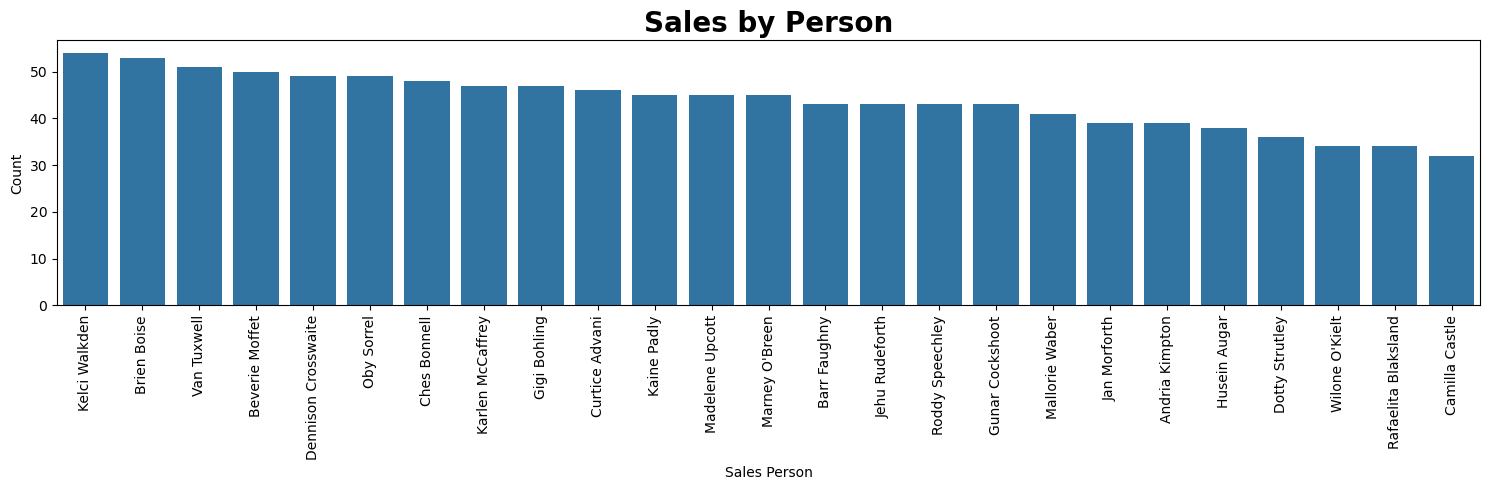

In [12]:
plt.figure(figsize=(15, 5))

sales_counts = df['Sales Person'].value_counts().reset_index()
sales_counts.columns = ['Sales Person', 'Count']

sns.barplot(x='Sales Person', y='Count', data=sales_counts)

plt.title('Sales by Person', size=20, fontweight="bold")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

As shown in the chart above, the graphic represents the number of sales made by each salesperson between March and August 2022.

From the data, it's clear that **Kelci Walkden** was the top performer, achieving over **50 sales** during the period — showing consistent and high performance. In contrast, **Camilla Castle** made just over **30 sales**, placing her at the lower end of the ranking.

This visualization not only helps highlight individual performance but can also guide future training or motivational initiatives. Salespeople with mid-range performance like **Brien Boise** or **Van Tuxwell** could be further empowered to reach top-tier levels. Additionally, analyzing top performers' strategies might uncover best practices that could benefit the entire team.


/var/folders/q4/47bgnsdd20d4r1dgw9h6m26c0000gn/T/ipykernel_3572/3492720027.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


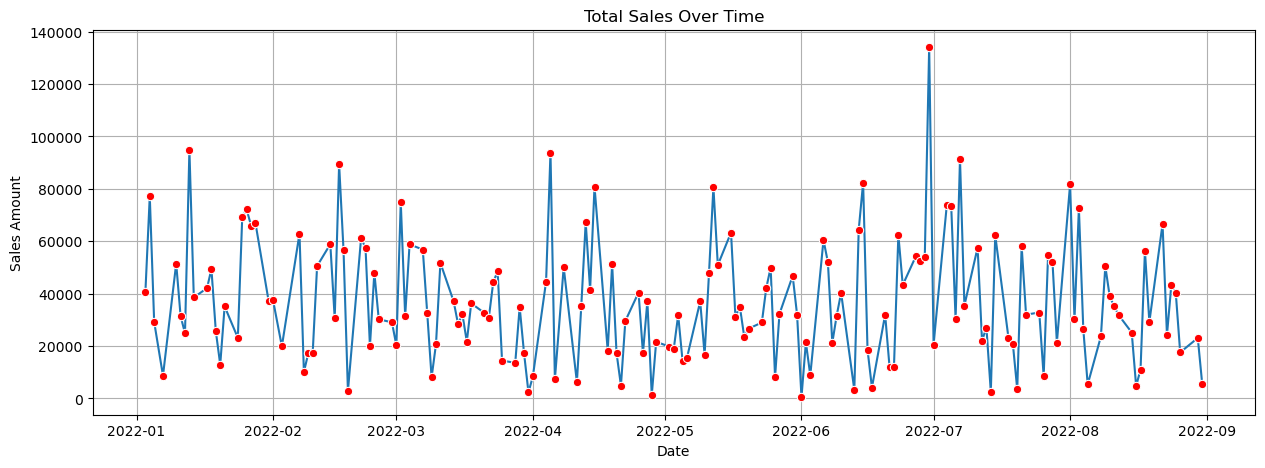

In [13]:
# total sales over time 
df['Date'] = pd.to_datetime(df['Date'])
df_grouped = df.groupby('Date')['Amount'].sum().reset_index()
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_grouped, x='Date', y='Amount', lw=1.5, marker='o', markerfacecolor='red')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.grid()
plt.show()

As shown in the chart above, the graph represents the **daily total sales amount** over time, covering the period from **January to September 2022**.

From the data, it’s clear that **sales activity is highly variable**, with frequent fluctuations and several standout peaks. Notably:
- The highest spike occurred around **July 2022**, where sales peaked at nearly **140,000**, indicating either a major event, promotion, or bulk order.
- There are several recurring dips where sales drop close to **zero**, potentially indicating weekends, holidays, or operational downtimes.

This visualization reveals important patterns in business performance:
- Teams could investigate high-performing days to understand what contributed to the surge.
- Similarly, analyzing low points might uncover operational inefficiencies or external market factors.
- **Smoothing the data** or grouping it by week/month can help in identifying more consistent trends.


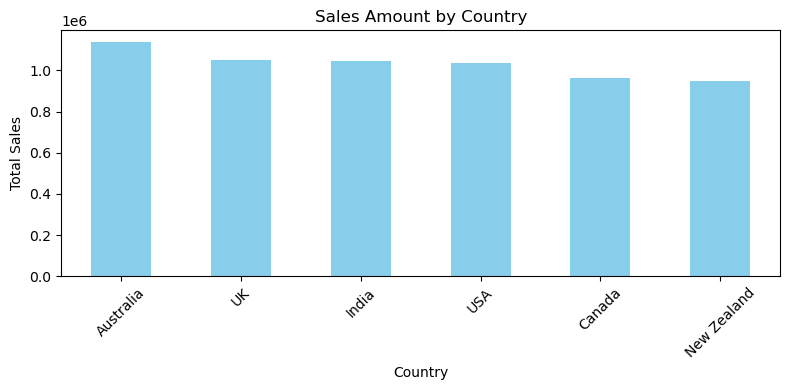

In [14]:
# sales by country 
country_sales = df.groupby('Country')['Amount'].sum().sort_values(ascending=False)
country_sales.plot(kind='bar', figsize=(8, 4), color='skyblue')
plt.title('Sales Amount by Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

As shown in the chart above, the graph presents the **total sales amount** across different countries. This helps identify regional performance and spot markets with the highest contribution.

From the data:
- **Australia** leads in total sales, slightly outperforming other countries, with sales exceeding **1.1 million**.
- **UK**, **India**, and **USA** follow closely, all showing strong and nearly equal performance, indicating a healthy distribution across these regions.
- **Canada** and **New Zealand** round out the group with slightly lower sales figures, but still contributing significantly — each nearing **1 million**.

This visualization provides valuable insights for strategic planning:
- High-performing countries like **Australia** could serve as benchmarks or targets for similar market strategies elsewhere.
- Countries with slightly lower sales could benefit from localized marketing campaigns or expanded outreach efforts.



/var/folders/q4/47bgnsdd20d4r1dgw9h6m26c0000gn/T/ipykernel_3572/3453710633.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


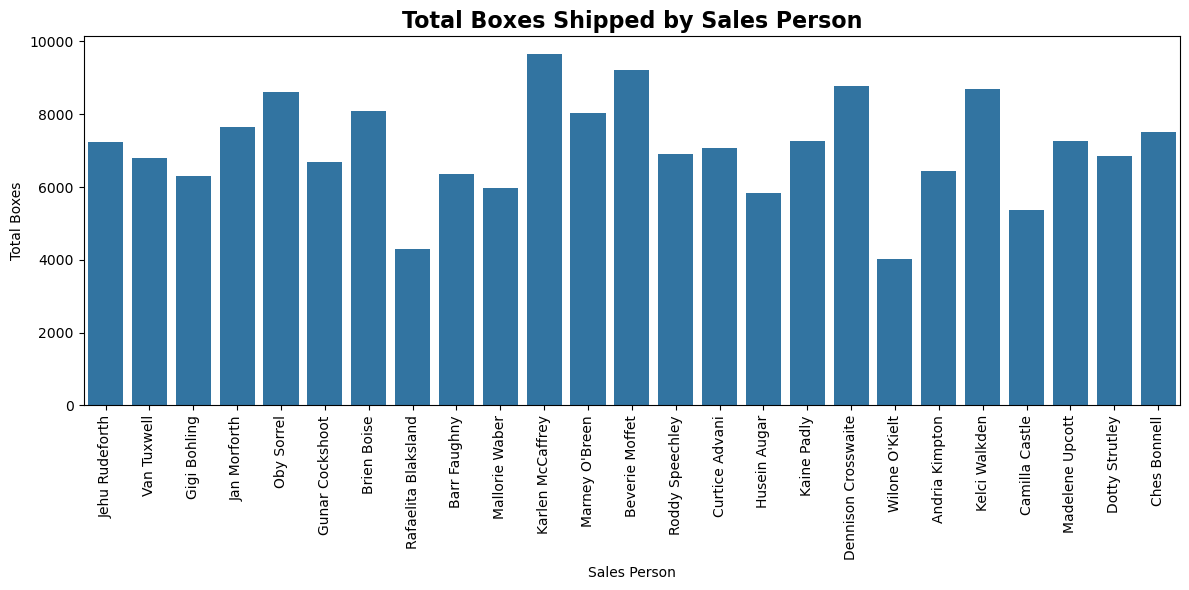

In [15]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=df,
    x='Sales Person',
    y='Boxes Shipped',
    estimator='sum',
    ci=None
)
plt.title('Total Boxes Shipped by Sales Person', fontsize=16, fontweight='bold')
plt.xticks(rotation=90)
plt.ylabel('Total Boxes')
plt.xlabel('Sales Person')
plt.tight_layout()
plt.show()


This chart displays how many boxes each salesperson has shipped, giving a clear view of logistical contribution across the team.

Looking at the data:
- **Karlen McCaffrey** stands out with the highest total, shipping nearly **10,000 boxes**, closely followed by **Marney O'Breen** and **Kelci Walkden**, who also show strong performance in the **9,000 range**.
- On the lower end, **Dennison Crosswaite** and **Brien Boise** have the fewest boxes shipped, each below the **5,000** mark — significantly lower than the team average.
- The majority of the team falls between **6,000 and 8,000 boxes**, suggesting a relatively balanced distribution of workload among the rest.

Overall, this visualization highlights both the top performers in shipping and those who may need additional support or have different roles impacting their shipment numbers.


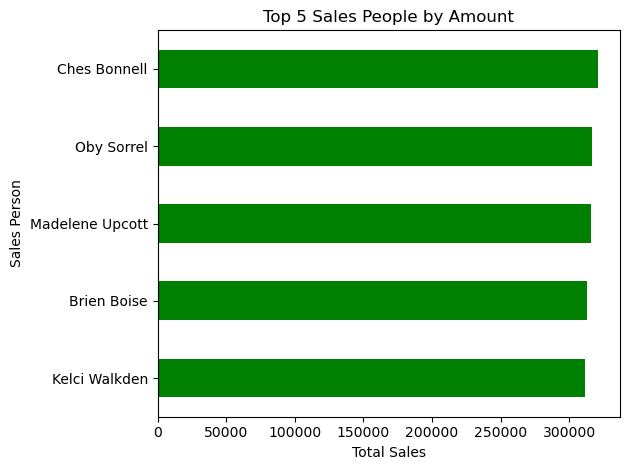

In [16]:
top_sellers = df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=True).tail(5)
top_sellers.plot(kind='barh', color='green')
plt.title('Top 5 Sales People by Amount')
plt.xlabel('Total Sales')
plt.tight_layout()
plt.show()

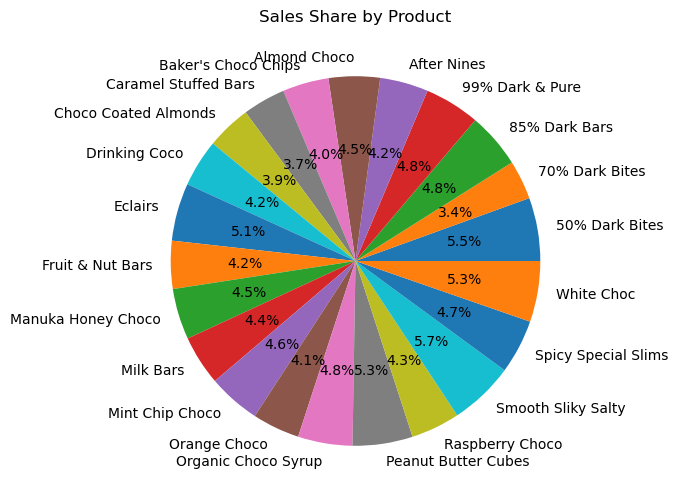

In [17]:
product_sales = df.groupby('Product')['Amount'].sum()
product_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))
plt.title('Sales Share by Product')
plt.ylabel('')
plt.show()

This pie chart shows how each product contributes to total sales revenue.

From the breakdown:
- **Smooth Silky Salty** leads the pack with the largest revenue share, accounting for over **10%** of total sales. It appears to be a top favorite among customers.
- Other standout performers include **50% Dark Bites**, **White Choc**, and **Peanut Butter Cubes**, each contributing significant slices of the revenue pie.
- On the lower end, **70% Dark Bites** and **Caramel Stuffed Bars** have relatively smaller shares, though still substantial enough to make a noticeable impact.

The sales distribution is fairly diverse, suggesting a well-balanced product portfolio — with both dark and milk-based varieties showing strong performance. This variety likely supports broader customer appeal and revenue stability across different taste preferences.


Together, these charts offer a well-rounded view of the business performance across multiple dimensions — from individual sales contributions and shipping activity to country-level trends and product revenue distribution.

The sales team has a clear set of top performers who consistently contribute to both sales volume and logistics, while mid-tier performers show potential for growth with the right support. Regional sales appear strong and fairly distributed, with markets like Australia leading the way. On the product side, a diverse lineup is driving revenue, with customer favorites emerging across both dark and milk chocolate categories.

These insights can help guide targeted improvements, celebrate strong performance, and inform strategic planning for sustained growth.